# Notebook analyse et lecture des clusters
## Importation des lib

In [1]:
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.offline.offline import _plot_html
import plotly.graph_objs as go
print (__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)

from mpl_toolkits import mplot3d
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
%matplotlib notebook
#%matplotlib inline
from utils import series_supp as ss
from utils import data_factory as df
from utils import k_mean as km
from utils import k_shape as ks

2.5.1


In [2]:
cwd = os.getcwd()
os.chdir(cwd)
print(cwd)
factory = df.DataFactory(cwd)
store_path = "cluster\\13_06\\"

RG24 = ss.SeriesSupp(cwd, factory, "RG24")
RG1 = ss.SeriesSupp(cwd, factory, "RG1")
GW = ss.SeriesSupp(cwd, factory, "GW")

C:\Users\utilisateur\workspace_stage


In [3]:
GW.import_dataset()
RG24.import_dataset()

Load csv_prepro\GW: Done
Load csv_prepro\RG\precipiation_RG: Done


In [4]:
#cluster_GW = km.Kmean(GW)
cluster_GW = ks.Kshape(GW)
cluster_RG = km.Kmean(RG24)

### Veuillez renseigner le nom du fichier ci dessous

In [5]:
name_file = "kmean_GW_[2015]_allmonths_w_10"

In [6]:
cluster_GW.read_cluster(store_path, name_file)

Parametre du GW pour plot

In [7]:
#cluster_GW.ss.years = [2014]
#cluster_GW.ss.months = [1]
#cluster_GW.ss.split_data_years()
#cluster_GW.ss.split_data_months()
#cluster_GW.ss.split_data_weeks()

Plot RG

In [8]:
#cluster_RG.ploter.change_mode(3)
#cluster_RG.ploter.plot_scatter(cluster_RG.ss.tmp_dataset)

Plot GW

In [9]:
#cluster_GW.ploter.change_mode(3)
#cluster_GW.ploter.plot_scatter(cluster_GW.ss.tmp_dataset)

## Affichage des cluster
* Prototypes en rouge
* informations en dessous
* repartition des objets dans les cluster

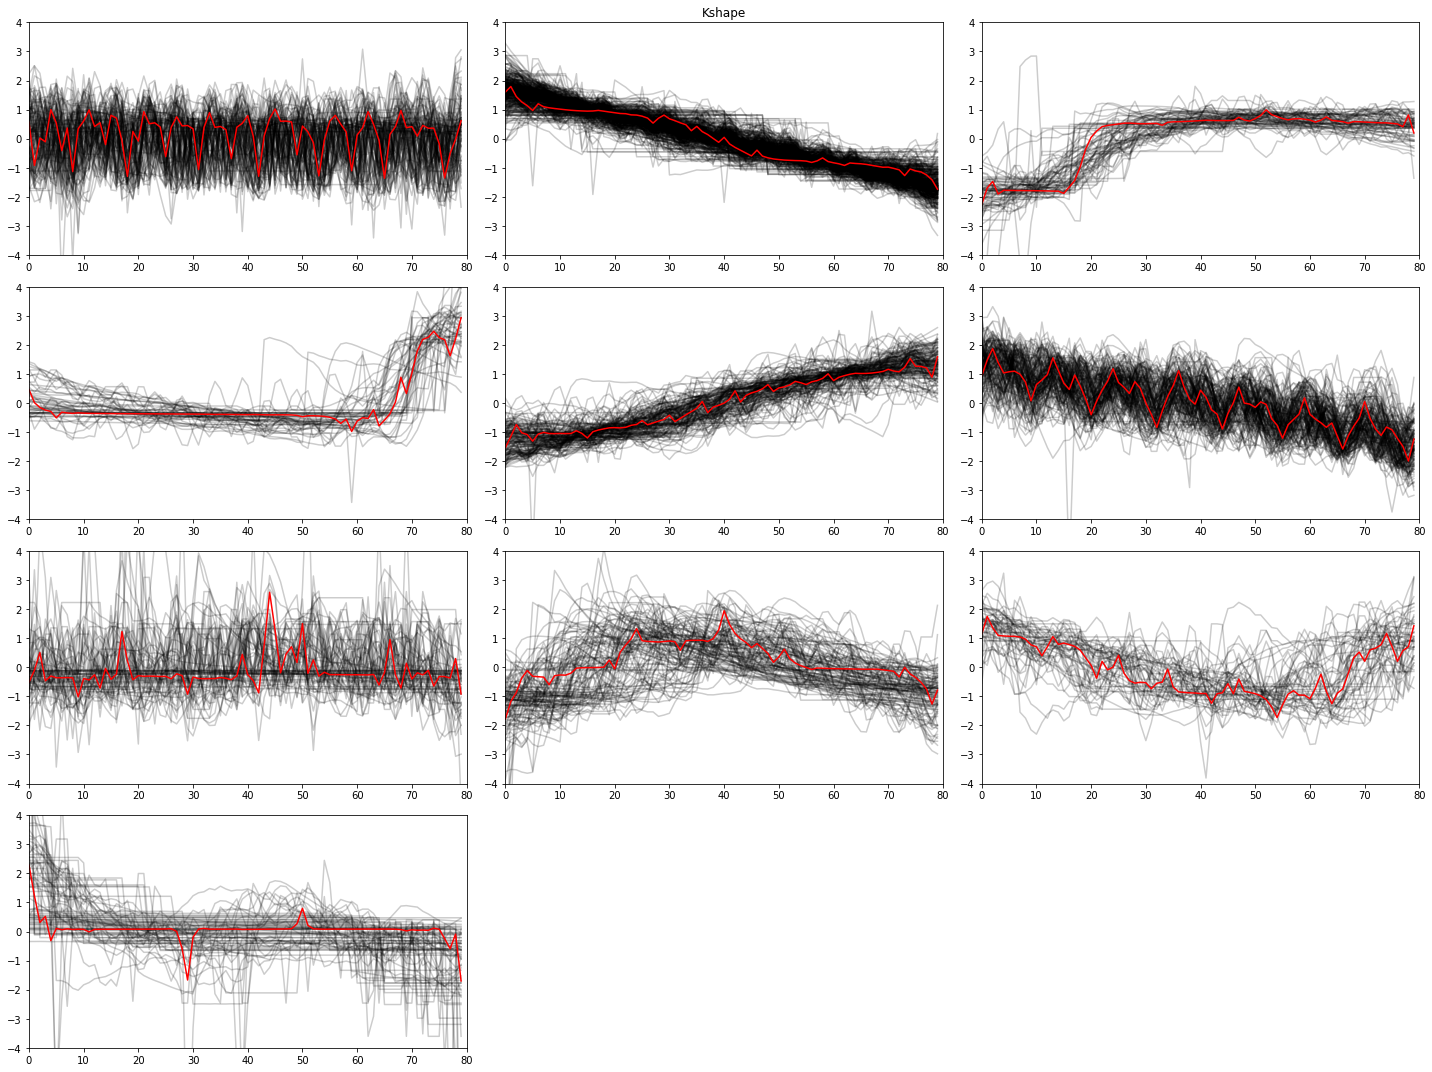

[2015]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
Weeks split: True
Normalized: True
min size of TS selected: 80
Sample size(0=None): 80
Algorithm used: Kmean
nb cluster: 10
Distance measure: softdtw



Counter({5: 154,
         1: 429,
         4: 144,
         6: 67,
         0: 105,
         8: 48,
         3: 47,
         7: 104,
         2: 64,
         9: 70})

In [10]:
cluster_GW.ploter.plot_cluster_light()
cluster_GW.show_info()
cluster_GW.cluster_counter()
cluster_GW.counter

In [11]:
cluster_GW.capteur_parser()
cluster_GW.ploter.change_mode(3)
#cluster_GW.cluster_by_fullname

## Analyse: n_obs est le numero du cluster à observer

In [12]:
n_obs = 4
#cluster_GW.geo.plotly_3D(cluster_GW.cluster_by_name[n_obs])
#cluster_GW.ploter.plot_histo(n_obs)
#cluster_GW.clust_hoverview(n_obs)

# Affichage des données GW a parametrer plus haut
cluster_GW.ploter.change_mode(3)
#cluster_RG.ploter.plot_scatter(cluster_RG.ss.dataset)

cluster_RG.ss.reset_dataset()
cluster_RG.ss.years = [2013, 2014, 2015]

cluster_RG.ss.split_data_years()
cluster_RG.ss.split_data_months()
cluster_RG.ss.split_data_weeks()

In [13]:
#cluster_RG = km.Kmean(RG24)
#cluster_RG.ploter.plot_scatter_by_capteur(cluster_RG.ss.dataset, ["24h_RG007", "24h_RG017"])

In [14]:
#for k, v in cluster_GW.ss.dataset.items():
#    print(k)

## Recherche et test sur le SAX

In [15]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation, OneD_SymbolicAggregateApproximation
import numpy as np
from prefixspan import PrefixSpan
from utils import sax_engine as se
from utils import prefix_span as ps

In [16]:
dataset = [cluster_GW.proto[0], cluster_GW.proto[1], cluster_GW.proto[2], cluster_GW.proto[3]]

In [17]:
se = se.SaxEngine()

In [18]:
se.fit(dataset)

In [19]:
se.run()

In [20]:
psm = ps.PrefixSpanManager(se)

In [21]:
psm.export_format()

In [25]:
psm.process_data

[array([3, 5, 2, 5, 4, 5, 2, 5, 4, 5, 3, 5, 4, 5, 3, 6, 4, 2, 5, 3, 5]),
 array([7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 4, 3, 2, 2, 1, 1, 1, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5]),
 array([4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2])]

In [29]:
psm.run()

In [30]:
print(psm.ps.topk(5))

[(4, [2]), (3, [2, 2]), (3, [4]), (3, [5]), (3, [5, 5])]


In [ ]:
dataset